# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [80]:
df = pd.read_csv('credit_card_approval.csv')
df

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,0,1,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [81]:
df.isna().sum()

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   sexo                                    16650 non-null  int64  
 2   posse_de_veiculo                        16650 non-null  int64  
 3   posse_de_imovel                         16650 non-null  int64  
 4   qtd_filhos                              16650 non-null  int64  
 5   idade                                   16650 non-null  float64
 6   tempo_emprego                           16650 non-null  float64
 7   possui_celular                          16650 non-null  int64  
 8   possui_fone_comercial                   16650 non-null  int64  
 9   possui_fone                             16650 non-null  int64  
 10  possui_email                            16650 non-null  in

In [83]:
y = df['mau']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: mau, dtype: bool

In [84]:
x = df.drop('mau', axis=1)
x.columns

Index(['Unnamed: 0', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [85]:
x.shape

(16650, 29)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [87]:
clf_train = DecisionTreeClassifier(random_state=100)
clf_train

DecisionTreeClassifier(random_state=100)

In [88]:
clf_train = clf_train.fit(x_train, y_train)
clf_train

DecisionTreeClassifier(random_state=100)

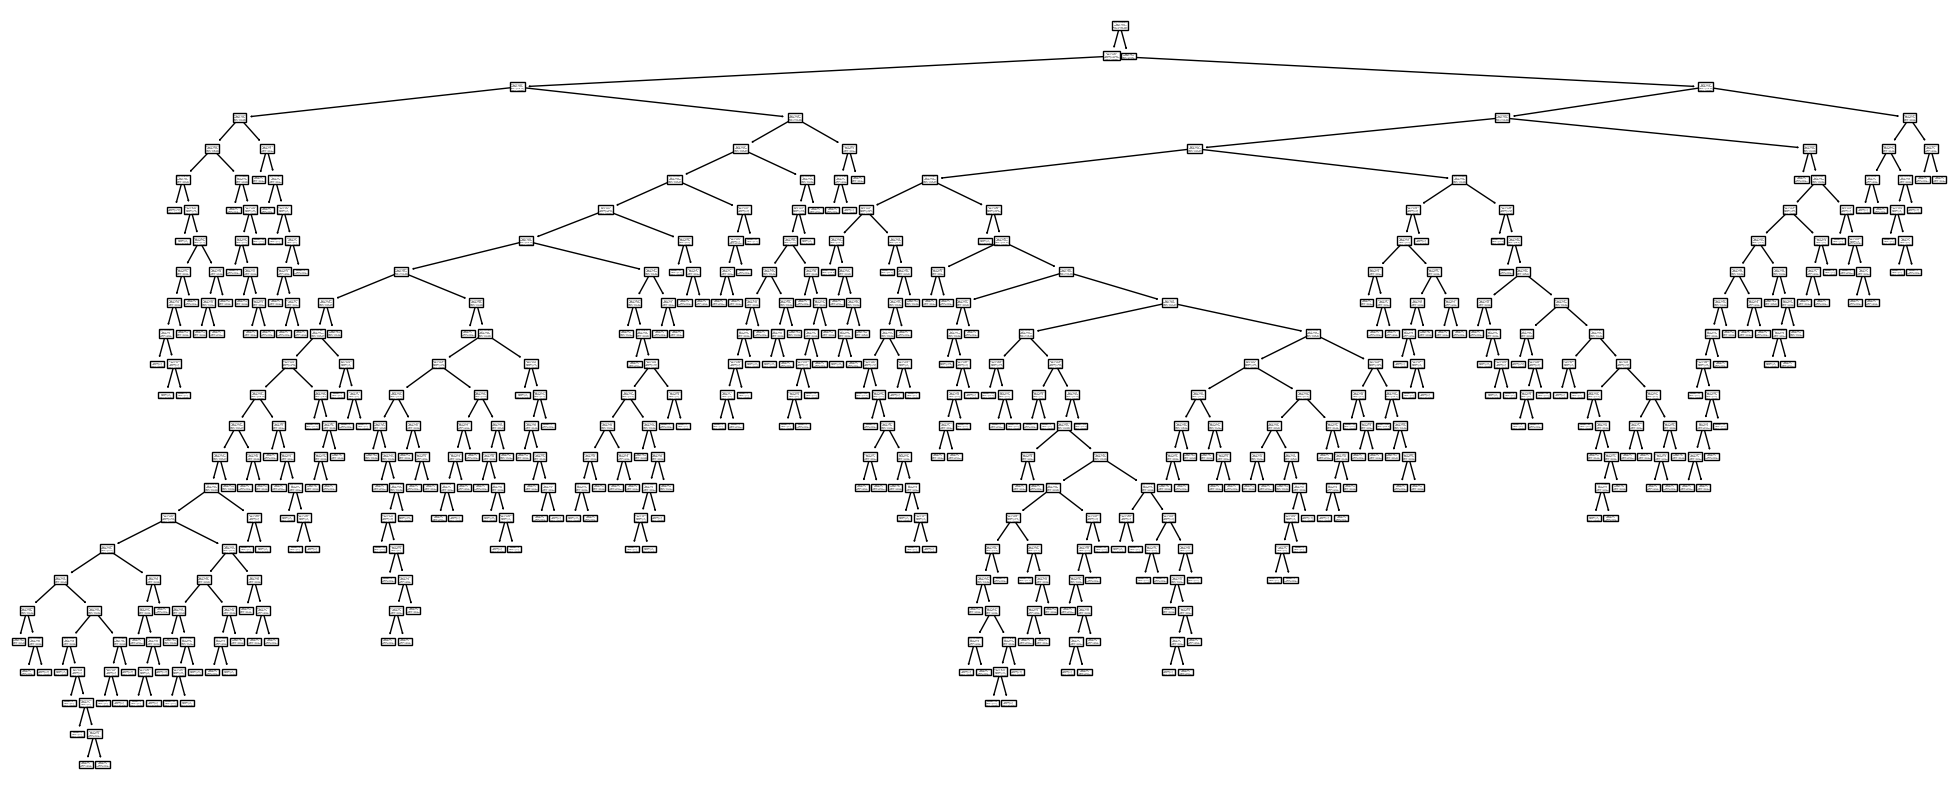

In [89]:
plt.figure(figsize=(25, 10))
tree.plot_tree(clf_train, class_names=['Aprovado', 'Reprovado'])
plt.show()

Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

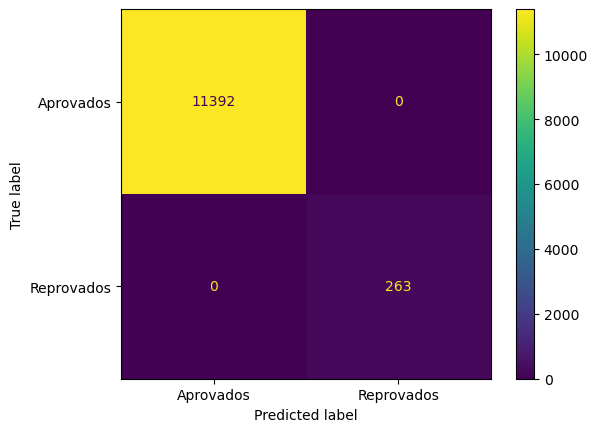

In [92]:
predictions = clf_train.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf_train.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Aprovados', 'Reprovados'])
disp.plot()
plt.show()

Calcule a acurácia na base de treinamento

In [93]:
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [94]:
clf_teste = DecisionTreeClassifier(random_state=100)
clf_teste

DecisionTreeClassifier(random_state=100)

In [95]:
clf_teste = clf_teste.fit(x_test, y_test)
clf_teste

DecisionTreeClassifier(random_state=100)

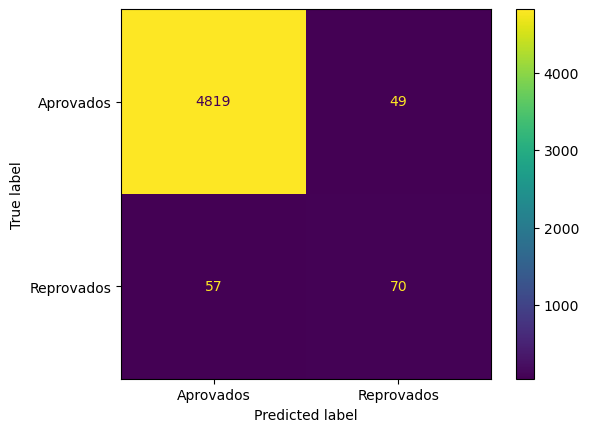

In [96]:
predictions_teste = clf.predict(x_test)
cm_teste = confusion_matrix(y_test, predictions_teste, labels=clf.classes_)
disp_teste = ConfusionMatrixDisplay(confusion_matrix = cm_teste, display_labels = ['Aprovados', 'Reprovados'])
disp_teste.plot()
plt.show()

In [97]:
accuracy_score(y_test, predictions_teste)

0.9787787787787787

Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

In [98]:
clf_podada = DecisionTreeClassifier(max_depth = 10, 
                                    min_samples_leaf=5
                                    , random_state = 123)
clf_podada

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [99]:
clf_podada = clf_podada.fit(x_train, y_train)
clf_podada

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

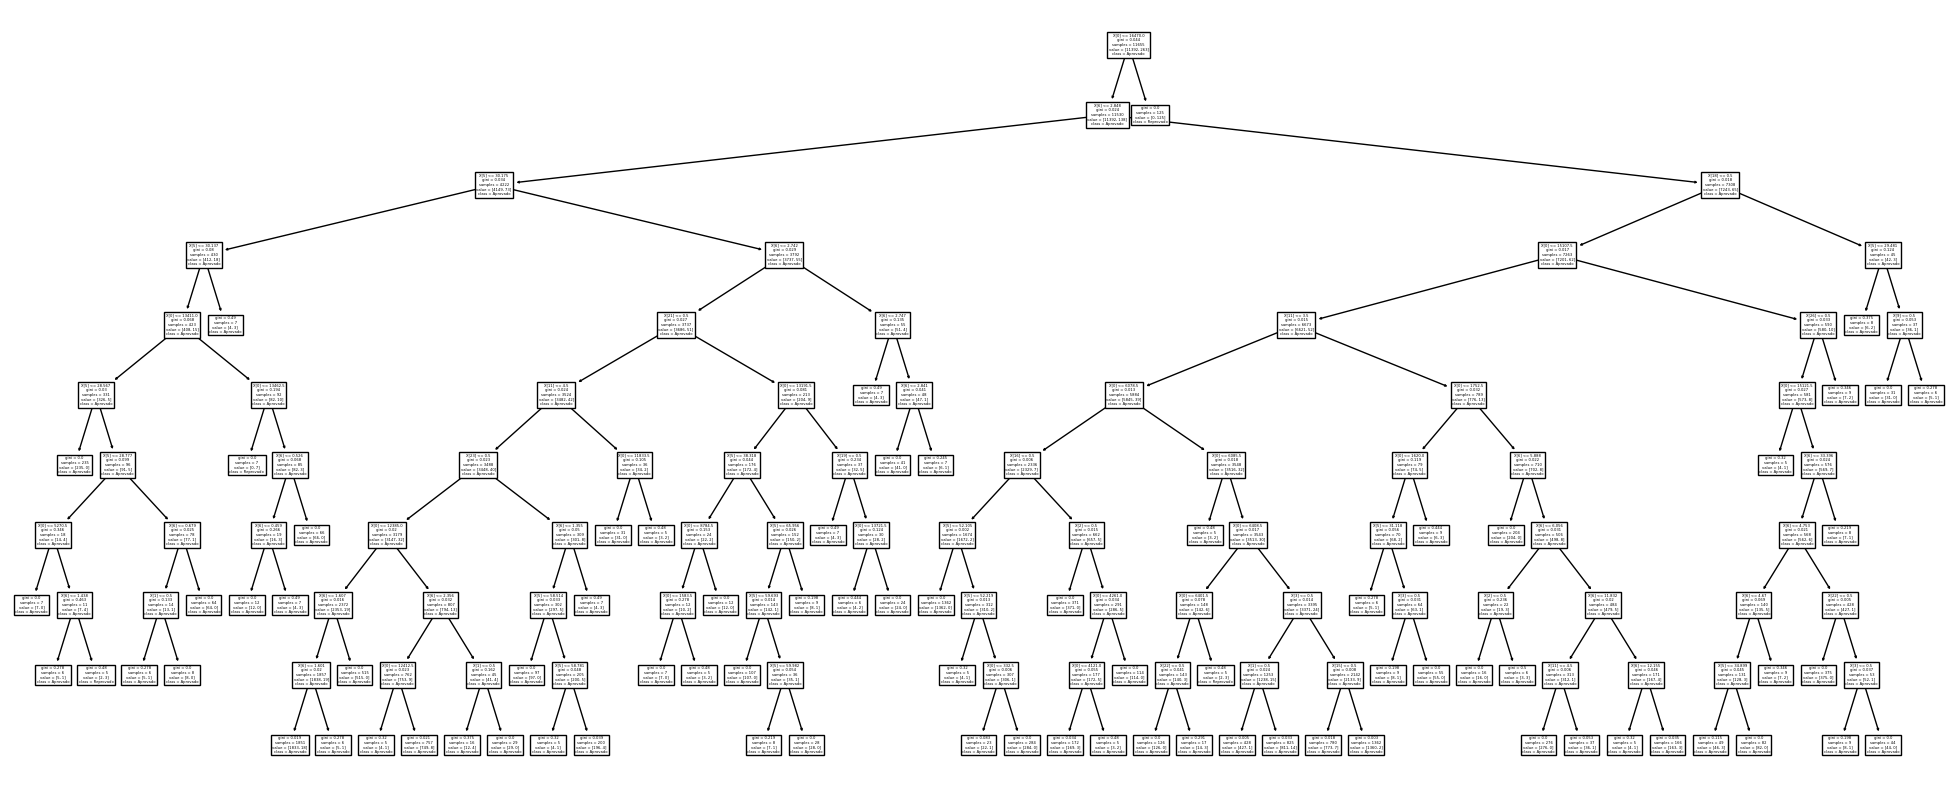

In [100]:
plt.figure(figsize=(25, 10))
tree.plot_tree(clf_podada, class_names=['Aprovado', 'Reprovado'])
plt.show()

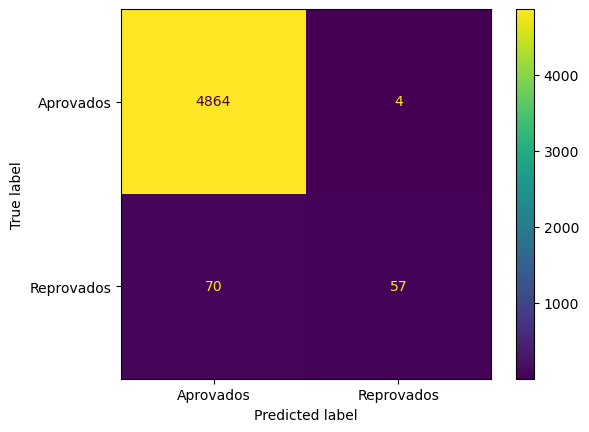

In [115]:
predictions_podada = clf_podada.predict(x_test)
cm_podada = confusion_matrix(y_test, predictions_podada, labels=clf_podada.classes_)
disp_podada = ConfusionMatrixDisplay(confusion_matrix = cm_podada, display_labels = ['Aprovados', 'Reprovados'])
disp_podada.plot()
plt.show()

In [105]:
accuracy_score(y_test, predictions_podada)

0.9851851851851852

Na nova predição, com as podas na árvore, 1% dos proponentes foram cllassificados como "maus".

In [106]:
57/(4864+4+70+57)

0.011411411411411412

Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [119]:
y_test.value_counts()

False    4868
True      127
Name: mau, dtype: int64

In [120]:
y_alterado = y_test.replace(False, True)
y_alterado.value_counts()

True    4995
Name: mau, dtype: int64

In [121]:
clf_alterado = DecisionTreeClassifier(max_depth = 10, 
                                    min_samples_leaf=5
                                    , random_state = 123)
clf_alterado

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [123]:
clf_alterado = clf_alterado.fit(x_train, y_train)
clf_alterado

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

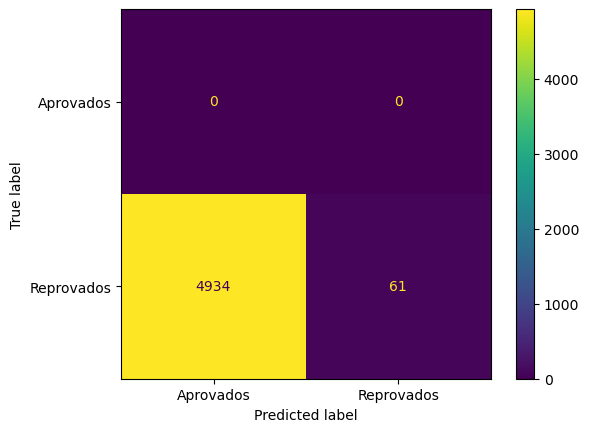

In [124]:
predictions_alterado = clf_alterado.predict(x_test)
cm_alterado = confusion_matrix(y_alterado, predictions_alterado, labels=clf_alterado.classes_)
disp_alterado = ConfusionMatrixDisplay(confusion_matrix = cm_alterado, display_labels = ['Aprovados', 'Reprovados'])
disp_alterado.plot()
plt.show()

In [125]:
accuracy_score(y_alterado, predictions_podada)

0.012212212212212211

Se todos os contratos fossem classificados como "bons", a acurácia da árvore seria de 1%.